In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [57]:
df = pd.read_csv("/content/USA_Housing.csv")
print(df.head())
print(df.info())


   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

In [60]:
X = df.drop(columns=["Price", "Address"])
y = df["Price"]

# Convert to numpy
X = X.values
y = y.values.reshape(-1, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)


In [62]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [63]:
model = nn.Linear(X_train.shape[1], 1)  # input = number of features, output = 1 target


In [64]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [65]:
epochs = 500

for epoch in range(epochs):
    model.train()

    # Forward pass
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch:3d} | Loss: {loss.item():.6f}")


Epoch   0 | Loss: 1.258350
Epoch  50 | Loss: 0.260626
Epoch 100 | Loss: 0.095244
Epoch 150 | Loss: 0.082399
Epoch 200 | Loss: 0.082023
Epoch 250 | Loss: 0.082021
Epoch 300 | Loss: 0.082021
Epoch 350 | Loss: 0.082021
Epoch 400 | Loss: 0.082021
Epoch 450 | Loss: 0.082021


In [66]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    test_loss = loss_fn(y_pred_test, y_test)
    print(f"\nTest Loss: {test_loss.item():.6f}")



Test Loss: 0.080683


In [67]:
y_pred_test = scaler_y.inverse_transform(y_pred_test.numpy())
y_test_orig = scaler_y.inverse_transform(y_test.numpy())


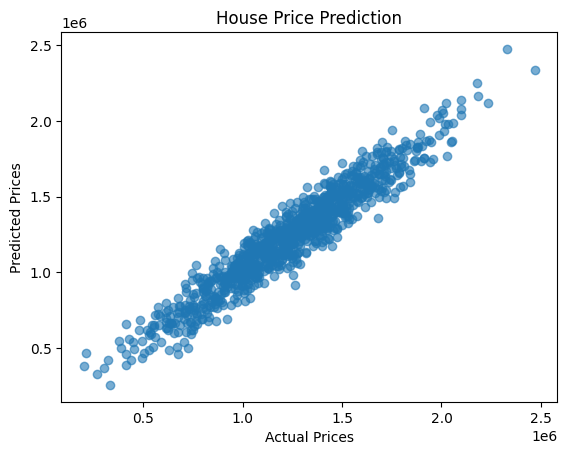

In [68]:
import matplotlib.pyplot as plt

plt.scatter(y_test_orig, y_pred_test, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("House Price Prediction")
plt.show()


In [69]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)

# Inverse transform the predictions and the test labels to the original scale
y_pred_test_orig = scaler_y.inverse_transform(y_pred_test.numpy())
y_test_orig = scaler_y.inverse_transform(y_test.numpy())

# You can now use y_pred_test_orig and y_test_orig for evaluation or visualization

In [73]:
import numpy as np

# Create mock data with the same features as the training data
mock_data = pd.DataFrame({
    'Avg. Area Income': [57353.0, 80000.0, 65000.0],
    'Avg. Area House Age': [8.075, 7.0, 5.5],
    'Avg. Area Number of Rooms': [5.678, 8.0, 6.5],
    'Avg. Area Number of Bedrooms': [4.44, 4.5, 3.5],
    'Area Population': [16906.0, 40000.0, 25000.0]
})

# Convert to numpy array and then to PyTorch tensor
mock_data_tensor = torch.tensor(mock_data.values, dtype=torch.float32)

# Scale the mock data using the same scaler fitted on the training data
mock_data_scaled = scaler_X.transform(mock_data_tensor.numpy())
mock_data_scaled = torch.tensor(mock_data_scaled, dtype=torch.float32)

print("Mock data (scaled):")
print(mock_data_scaled)

Mock data (scaled):
tensor([[-1.0495,  2.1155, -1.2902,  0.3732, -1.9255],
        [ 1.0665,  1.0334,  1.0106,  0.4221,  0.3910],
        [-0.3350, -0.4766, -0.4757, -0.3934, -1.1136]])


In [74]:
mock_data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,57353.0,8.075,5.678,4.44,16906.0
1,80000.0,7.000,8.000,4.50,40000.0
2,65000.0,5.500,6.500,3.50,25000.0


In [75]:
model.eval()
with torch.no_grad():
    mock_predictions_scaled = model(mock_data_scaled)

# Inverse transform the predictions to the original scale
mock_predictions_orig = scaler_y.inverse_transform(mock_predictions_scaled.numpy())

print("\nPredicted Prices for Mock Data:")
print(mock_predictions_orig)


Predicted Prices for Mock Data:
[[ 884648.2 ]
 [1828555.2 ]
 [ 845841.44]]
